# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [47]:
data = pd.read_csv("C:\\Users\\Админ\\Desktop\\pandas\\creditcard.csv")

In [48]:
target = data["Class"]
objects = data.drop("Class", axis=1)

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(objects, target)

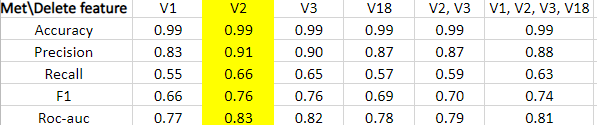

In [50]:
X_resampled.drop(["V2", "Amount"], axis=1, inplace=True)

In [ ]:
Размерность - 284807 столбцов и 31 признак

Признаки:
    Time - Количество секунд, прошедших между этой транзакцией и первой транзакцией в наборе данных
    (V1 - V28) - зашифрованные признаки
    Amount - сумма транзакции
    Class - (1 - мошенническая транзакция, 0 - обычная транзакция)

Пропусков в данных нет

In [5]:
target.value_counts()

# жесточайший перекос в данных, необходимо тщательно подойти к этому моменту

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# практически все столбцы имеют маленькие значения, выделяеются лишь Time и Amount.
# я думаю, что стоит попробовать привести данные к одному диапазону значений с помощью нормализации

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

# по матрице пока что сложно что - то сказать, ибо где то прослеживается линейная зависимость, 
# а где - то вообще пустота

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [51]:
X_resampled["Time"] = np.log(X_resampled["Time"] + 1)
X_resampled["Time"] = X_resampled["Time"].fillna(1.228545)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

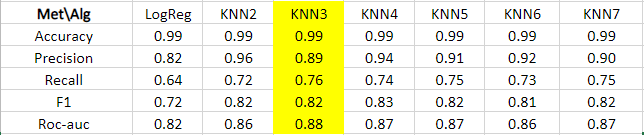

In [53]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [63]:
#y_pred_knn = knn.predict(X_test)
print_metrics(y_test, y_pred_knn)

Accuracy: 0.9995427606703832
Precision: 0.9990859339294295
Recall: 1.0
F1: 0.9995427579900111
Roc-auc: 0.9995429723205287
[[85256    78]
 [    0 85255]]


In [62]:
def print_metrics(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1: {f1_score(y_test, y_pred)}")
    print(f"Roc-auc: {roc_auc_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))

Вывод

Про данные:

Изменять данные я никак не стал, они лежат в одном диапазоне, кроме призанка Time, его я прологарифмировал.
    
Я изначально посмотрел на PCA и выбрал признаки, который исключу из даных, это признаки: V1, V2, V3, V18.
Выбрал я их из - за очень низкой корреляции с целевой переменной. Понимаю, что возможно и нет линейной
зависимости, но начать с чего - то нужно было.

Построил базовую модельку лог рег, получил очень маленькие метрики. Решил убирать по очереди признаки,
группировать их и т д. По итогу получил, что убрав просто V2 я получу лучший профит.

Чуть погодя я вспомнил про такую крутую вещь, как матрица корреляции. Я просмотрел признаки и их корре-
ляцию и заметил, что есть признак Amount, который сильно коррелировал много с кем, но только не с таргетом.
Я решил удалить его и получил прирост итоговой метрики в +5 (Recall)

Про перекос в классах:
    
Ужасный перекос и для его решения я использовал SMOTE Oversampling. При использовании данного подхода я 
получил до удивления хорошие метрики, но что - то подсказывает, что есть подвох...

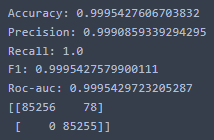

Про метрику:
    
Я вообще вывожу все метрики для наглядности. Это ради тренировки и понимания. Про Accuracy я молчу, при
таком огромной разбросе в классах глупо что - то говорить про информативность Accuracy. Остальные же 
метрики достаточно показательные.

Если отвечать на вопрос ниже, про выбор метрику, то я отвечу так:
нужно улучшать метрику recall, ибо в этой метрике есть такой компонент, как FN. 
Нам нужно, чтобы FN был минимален, ибо FN говорит о том, что транзакция была мошеннической,
а мы определили её как обычную. То есть при максимальном Recall мы определим все мошеннические транзакции.

Про моделирование:

После этого я начал изучать модели, которые можно построить, выбрал между двумя семействами: LogReg и KNN.
    
Модели я выбирал так, сравнил сначала базовую модель одного и другого семейства и получил, что прирост
по главной метрике был более 8 пунктов. Отсюда я выбрал KNN и начал развивать мысль с подбором соседей.

Я построил 8 моделей KNN с количеством соседей [2, 8]. По итогу получил, что после 3 соседей данные примерно одинаковые и хуже. Я остановился на 3 соседях.

Тюннинг моделей был, прироста не дал, использовал GridSearchCV.

Итог:
    
По итогу я получил итоговый средний Recall в 0.81, а также очень высокий Precision(не будем приставать к
рандомным пользователям с подозрением на мошенничество):)

Итоговые метрики:
Accuracy: 0.99
Precision: 0.95
Recall: 0.81
F1: 0.87
Roc-auc: 0.89
    
P.S. на моих скринах показан ход работы, какие - то моменты дорабатывались после создания этих фото.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from matplotlib import pyplot as plt
from plotly import express
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [3]:
load_data = datasets.load_digits()


In [4]:
data = pd.DataFrame(load_data.data)
data['digits'] = load_data.target.reshape(-1,1)

In [19]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
Всего 1797 объектов, 65 колонок. Каждая колонка отвечает за пиксель

In [ ]:
Необходимо предсказать число [0;9] на выходе

In [6]:
data["digits"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: digits, dtype: int64

In [ ]:
Пропусков в данных не обнаружено

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [8]:
np.mean(list(data["digits"].value_counts()))

179.7

In [ ]:
Распределение предсказываемых значений в данных примерно одинаковое и равняется 180

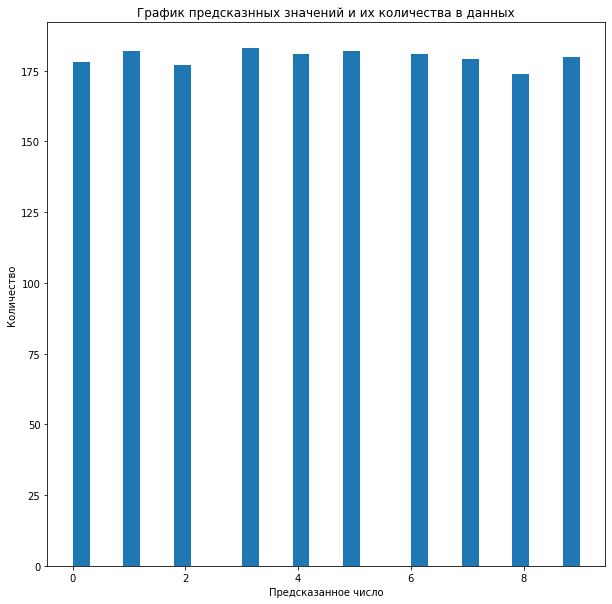

In [9]:
plt.figure(figsize=(10, 10))
plt.hist(x=data["digits"], bins=30)
plt.xlabel("Предсказанное число")
plt.ylabel("Количество")
  
plt.title("График предсказнных значений и их количества в данных")
plt.show()

In [10]:
target = data["digits"]
data = data.drop("digits", axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3,
                                                    random_state=42, shuffle=True)

Logistic Regression

In [48]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear').fit(x_train, y_train)
# multi_class - one vs rest подход
y_pred = lr.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))

0.9537037037037037
0.9533431246719621
0.9543363662681458
0.9524191360643031


KNN

In [49]:
errors_accuracy = []
errors_precision = []
errors_recall = []
errors_f1 = []

for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    errors_accuracy.append(accuracy_score(y_test, y_pred))
    errors_precision.append(precision_score(y_test, y_pred, average="macro"))
    errors_recall.append(recall_score(y_test, y_pred, average="macro"))
    errors_f1.append(f1_score(y_test, y_pred, average="macro"))

In [50]:
print(f"Accurcy: {max(errors_accuracy)}")
print(f"Precision: {max(errors_precision)}")
print(f"Recall: {max(errors_recall)}")
print(f"F1: {max(errors_f1)}")

Accurcy: 0.9944444444444445
Precision: 0.9950499366060903
Recall: 0.9949152542372881
F1: 0.9948955471749257


Отсюда можно заметить, что все метрики выглядят круто.
Подходящий алгоритм для решения задачи - KNN, k = 6.

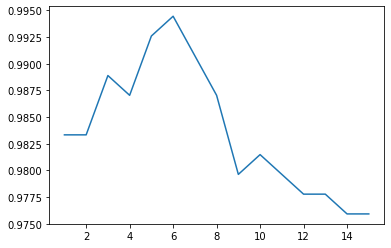

In [29]:
plt.plot(list(range(1, 16)), errors)
plt.show()

пиковая точка соответсвует k = 6
это для метрики Accuracy

SVM

In [53]:
model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(x_test, y_test)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))

1.0
1.0
1.0
1.0


Про данные:
Данные дополнительно никак не предобрабатывал, это и не нужно, с ними всё ок, даже скалировать не нужно. Перекоса, пропусков и других недугов в данных не обнаружено.

Про метрику: В целом, если выбирать метрику, которую нужно максимизировать, я выбираю Accuracy. Данные позволяют это сделать, у нас нет дисбаланса классов. Тогда мы просто будем получать то, насколько точны наши предсказания. Сумма предсказания всех классов, делённая на количество всех объектов предсказания. 

Про моделирование: я выбрал 3 алгоритма, которые буду реализовывать: логистическая регрессия, к ближайших соседий, метод опорных векторов. Все они могут быть использованы для многоклассовой классификации. Все алгоритмы показали просто превосходный результат. Самым лучшим алгоритмом оказался метод опорных векторов, на нём я выбил 1 на главной метрике, загадочно кстати.....

Итог: я добился поставленной задачи, итоговый алгоритм - SVM, итоговая метркиа - Accuracy.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?